# Exploring Decision Tree Algorithm

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

D:\Anaconda\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## Loading Dataset

In [2]:
iris = pd.read_csv('Iris.csv')

In [5]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris = iris.drop(['Id'], axis = 1)

In [7]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Visualisation and Prediction

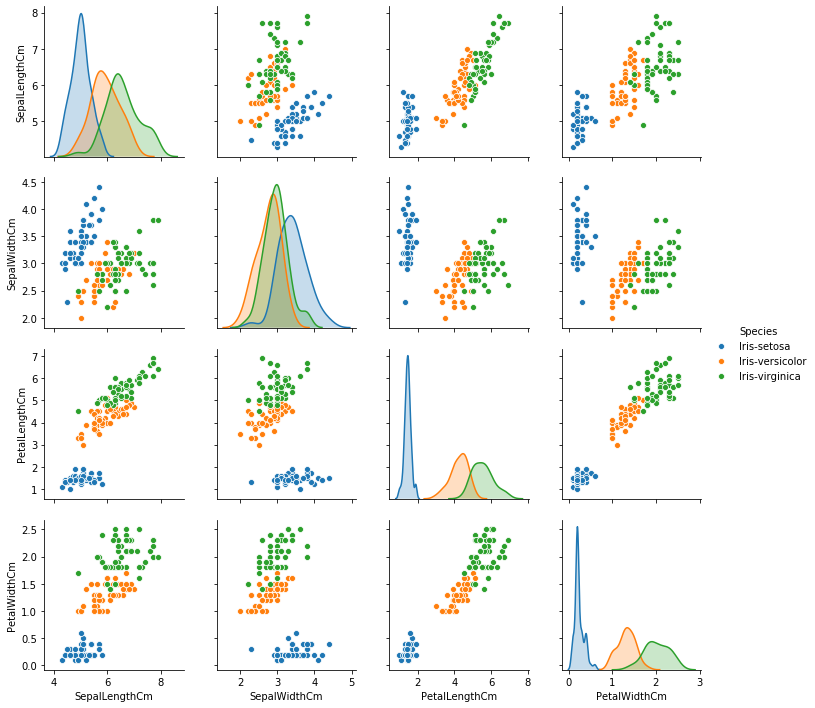

In [4]:
sns.pairplot(iris, hue='Species');

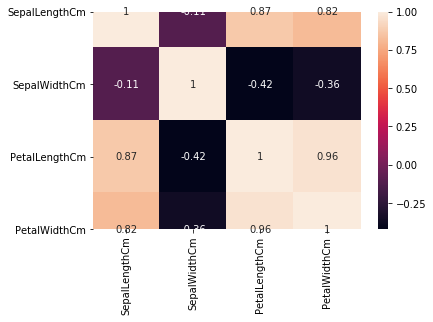

In [5]:
sns.heatmap(iris.corr(), annot=True)
plt.show();

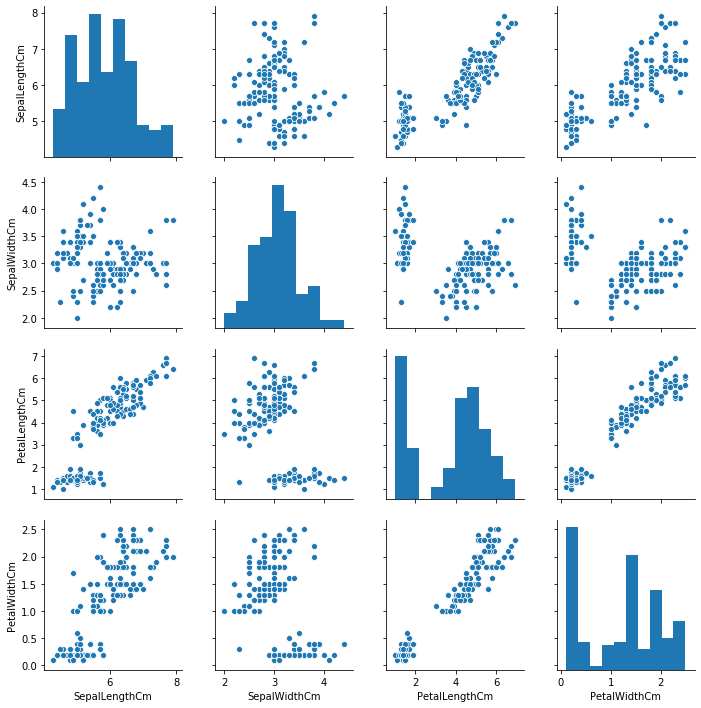

In [6]:
sns.pairplot(iris);

In [12]:
X = iris.drop('Species', axis=1)
y = iris['Species']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [14]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [15]:
predictions = dtree.predict(X_test)

In [16]:
classification_report(y_test,predictions)

'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        10\nIris-versicolor       1.00      1.00      1.00         9\n Iris-virginica       1.00      1.00      1.00        11\n\n       accuracy                           1.00        30\n      macro avg       1.00      1.00      1.00        30\n   weighted avg       1.00      1.00      1.00        30\n'

In [17]:
confusion_matrix(y_test,predictions)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

## Plotting Decision Tree

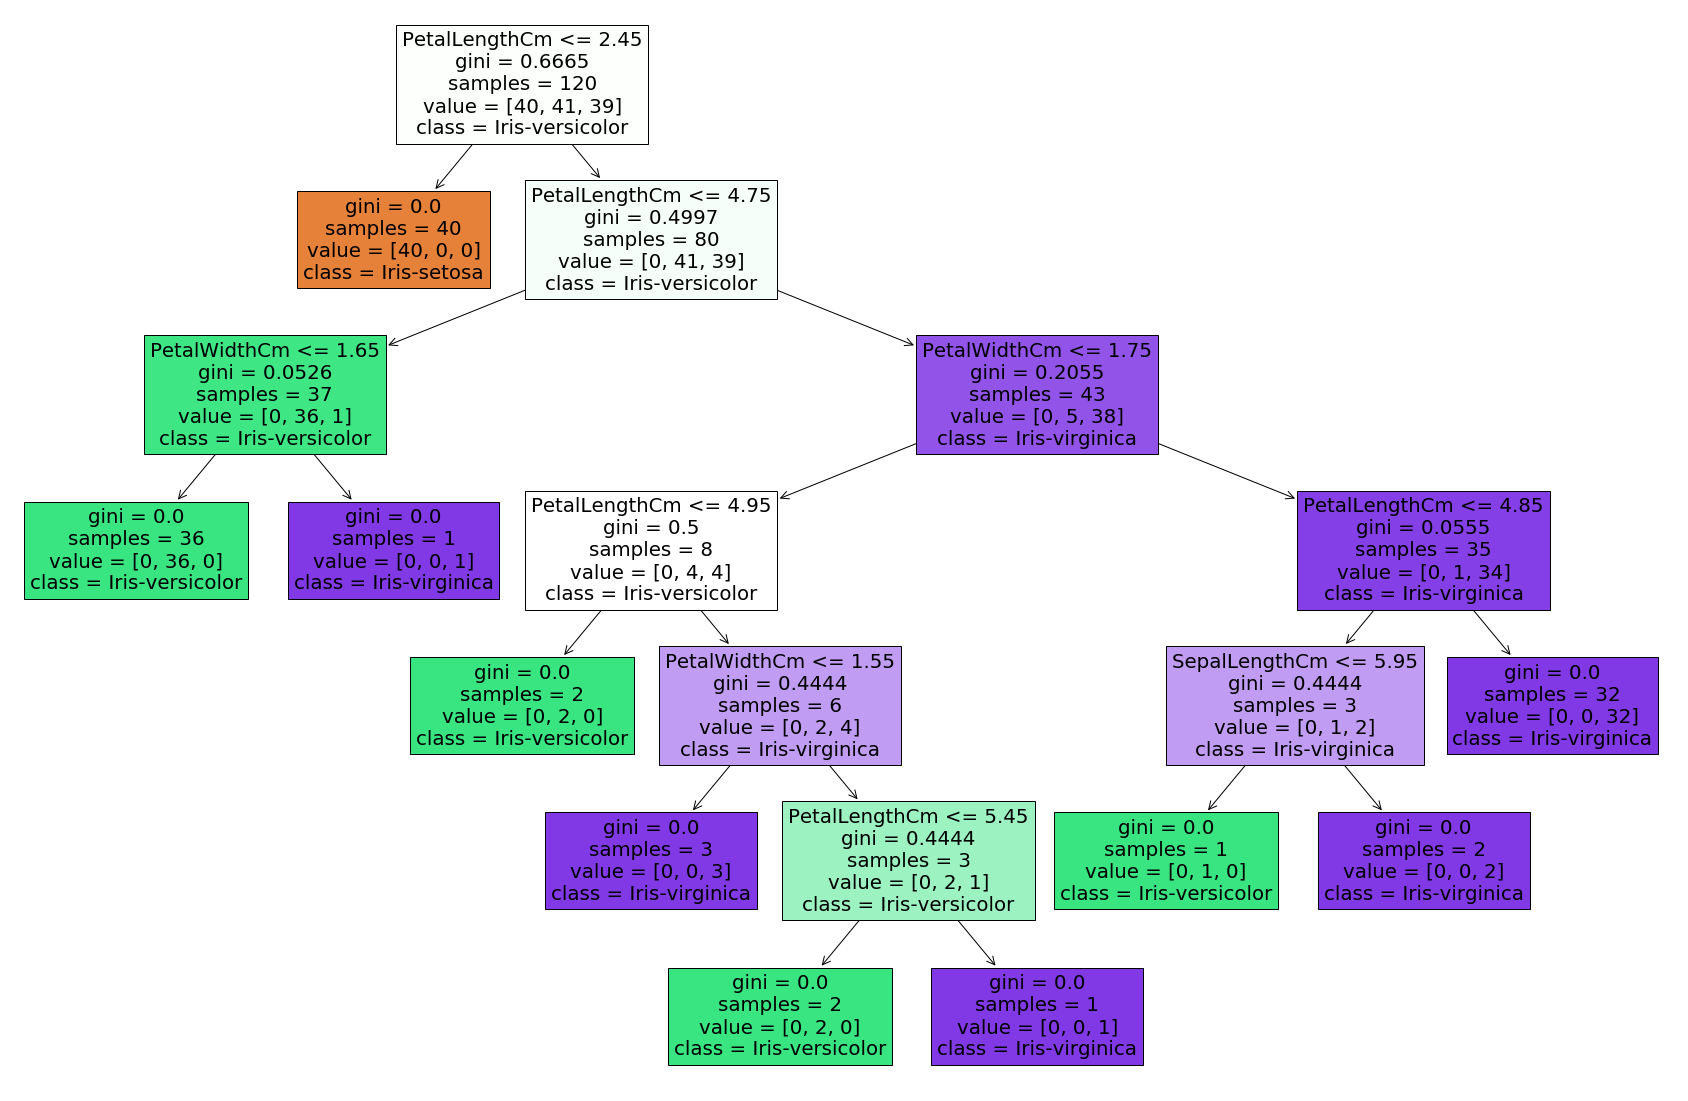

In [18]:
plt.figure(figsize=(30,20))

tree_img= plot_tree(dtree,feature_names = iris.columns, class_names=iris['Species'].unique().tolist(), 
                    precision=4,label="all",filled=True)
plt.show()